Rating mean: 4.54750593824228
Helpful_Count mean: 0.8087885985748219
Rating median: 5.0
Helpful_count median: 0.0
Rating mode: 0    5
Name: rating, dtype: int64
Helpful_count mode: 0    0
Name: helpful_count, dtype: int64
Rating std: 0.7512176104831478
Helpful_count std: 1.4711716331826372
Rating var: 0.5643278983000104
Helpful_count var: 2.164345974281268
Rating quantile: 0.25    4.0
0.50    5.0
0.75    5.0
Name: rating, dtype: float64
Helpful_count quantile: 0.25    0.0
0.50    0.0
0.75    1.0
Name: helpful_count, dtype: float64


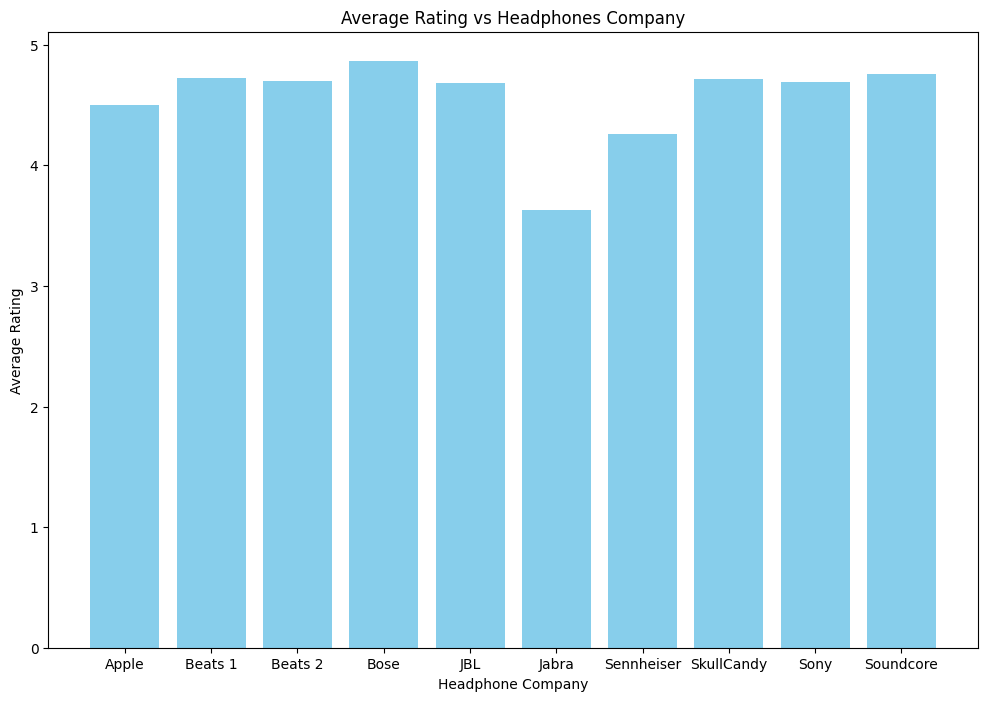

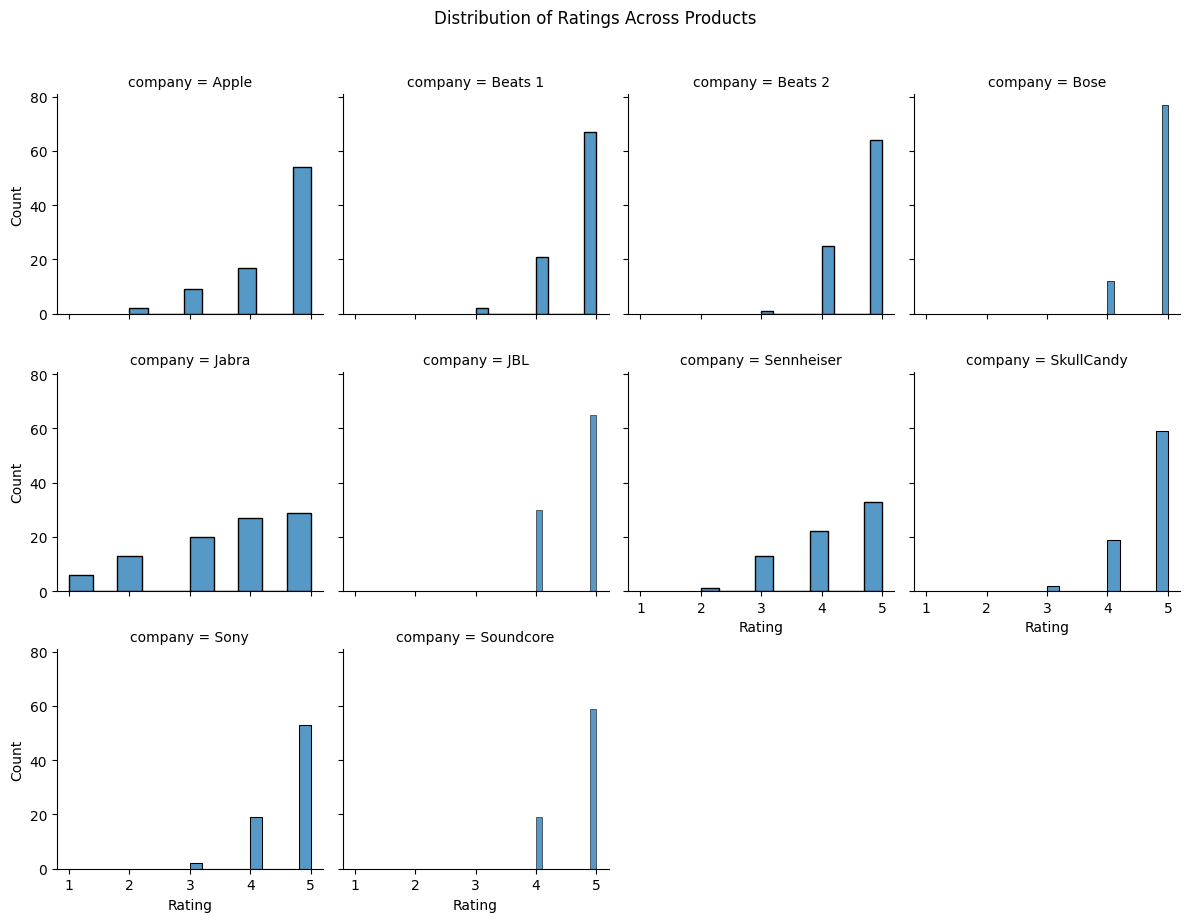

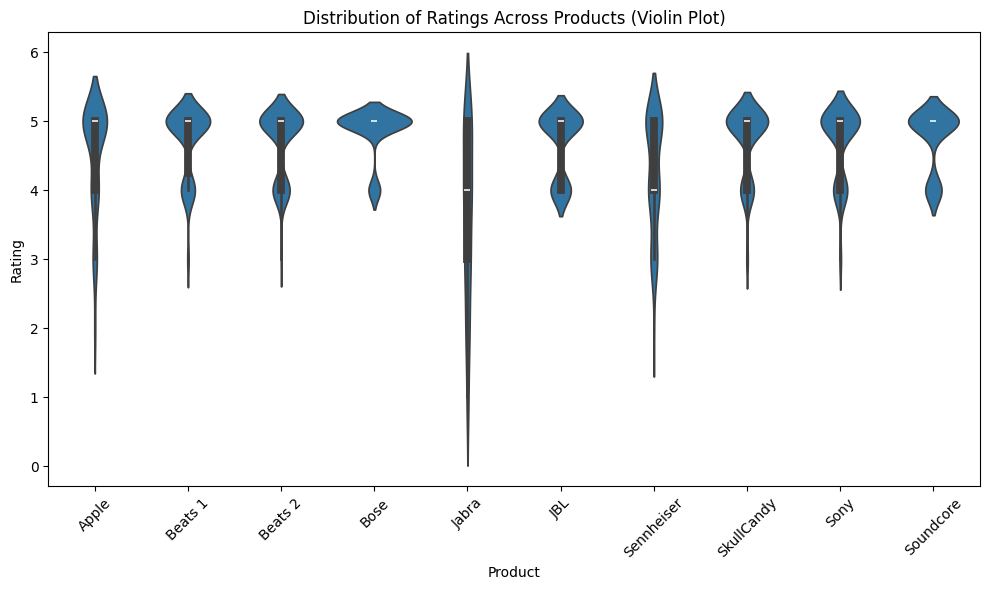

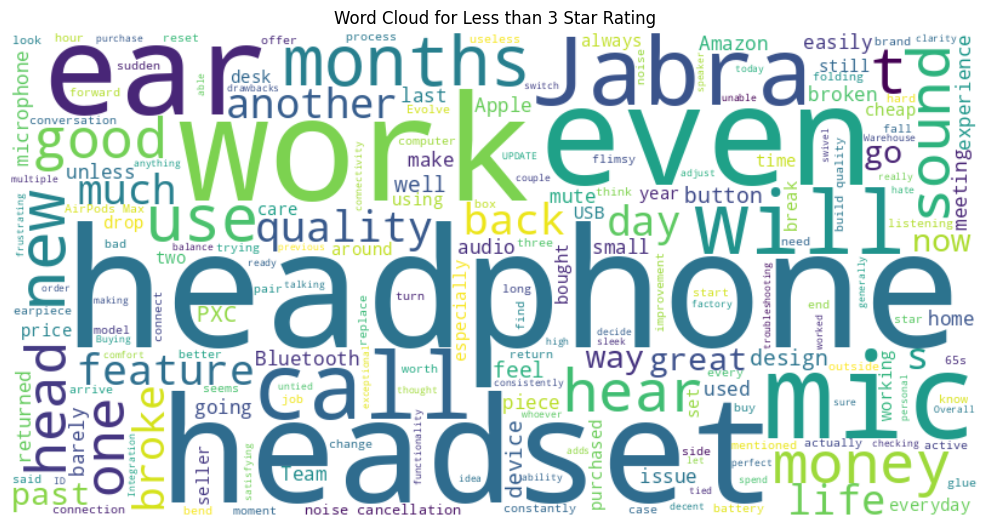

Sentiment Analysis Results:
sentiment
Positive    769
Negative     42
Neutral      31
Name: count, dtype: int64

Percentage Distribution:
sentiment
Positive    91.330166
Negative     4.988124
Neutral      3.681710
Name: count, dtype: float64


In [9]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

#Initial EDA
df = pd.read_csv('cleanedata.csv')
df.head()
rating_mean = df['rating'].mean()
print('Rating mean:',rating_mean)
helpful_mean = df['helpful_count'].mean()
print('Helpful_Count mean:',helpful_mean)
rating_median = df['rating'].median()
print('Rating median:',rating_median)
helpful_median = df['helpful_count'].median()
print('Helpful_count median:',helpful_median)
rating_mode = df['rating'].mode()
print('Rating mode:',rating_mode)
helpful_mode = df['helpful_count'].mode()
print('Helpful_count mode:',helpful_mode)
rating_std = df['rating'].std()
print('Rating std:',rating_std)
helpful_std = df['helpful_count'].std()
print('Helpful_count std:',helpful_std)
rating_var = df['rating'].var()
print('Rating var:',rating_var)
helpful_var = df['helpful_count'].var()
print('Helpful_count var:',helpful_var)
rating_quantile = df['rating'].quantile([0.25,0.5,0.75])
print('Rating quantile:',rating_quantile)
helpful_quantile = df['helpful_count'].quantile([0.25,0.5,0.75])
print('Helpful_count quantile:',helpful_quantile)

# Bar Graph For Average Rating vs Headphone Company
id_to_company = {
    'B08PZJN7BD': 'Apple',
    'B0C8PR4W22': 'Beats 1',
    'B07YVYZ8T5': 'Beats 2',
    'B0CCZ26B5V': 'Bose',
    'B00ODRSN0A': 'Jabra',
    'B08WM3LMJF': 'JBL',
    'B0CDH415QV': 'Sennheiser',
    'B08FCGH2RL': 'SkullCandy',
    'B08MVGF24M': 'Sony',
    'B08HMWZBXC': 'Soundcore'
}
df['company'] = df['product_id'].map(id_to_company)
average_ratings = df.groupby('company')['rating'].mean().reset_index()
plt.figure(figsize=(12, 8))
plt.bar(average_ratings['company'], average_ratings['rating'], color='skyblue')
plt.title('Average Rating vs Headphones Company')
plt.xlabel('Headphone Company')
plt.ylabel('Average Rating')
plt.savefig('average_ratings.pdf')
plt.show()

#FacetGrid for comparing ratings across different products
df['company'] = df['product_id'].map(id_to_company)
g = sns.FacetGrid(df, col = 'company', col_wrap=4, height=3)
g.map(sns.histplot, 'rating', bins=10)
g.set_axis_labels('Rating', 'Count')
g.fig.suptitle('Distribution of Ratings Across Products', y=1.02)
plt.tight_layout()
plt.show()

#Violin Plot
df['company'] = df['product_id'].map(id_to_company)
plt.figure(figsize=(10, 6))
sns.violinplot(x='company', y='rating', data=df)
plt.xlabel('Product')
plt.ylabel('Rating')
plt.title('Distribution of Ratings Across Products (Violin Plot)')

# Show plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.tight_layout()
plt.show()

#WordCloud for Low Ratings
low_rating_threshold = 3
filtered_reviews = df[(df['rating'] < low_rating_threshold)]
all_reviews = ' '.join(filtered_reviews['content'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Less than 3 Star Rating')
plt.tight_layout()
plt.show()

#Sentiment Analysis
def sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'
df['sentiment'] = df['content'].apply(sentiment)

counts = df['sentiment'].value_counts()
percentages = (counts / len(df)) * 100

print("Sentiment Analysis Results:")
print(counts)
print("\nPercentage Distribution:")
print(percentages)





